# ML Analysis
Will attempt to do some sort of clustering.
## Set up Environment

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# vectorizing the book info column using TFidf Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
path = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/")

In [4]:
os.listdir(path + 'cleaned')

['.DS_Store',
 'BX-Books.csv',
 'BX-Ratings.csv',
 'BX-Users.csv',
 'BX-NewBooksRatings.csv',
 '.ipynb_checkpoints']

## Pull in required data:

In [23]:
books = pd.read_csv(path + 'cleaned/BX-Books.csv')
users = pd.read_csv(path + 'cleaned/BX-Users.csv')
ratings = pd.read_csv(path + 'cleaned/BX-Ratings.csv')

In [24]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector
0,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada,clara callan by richard bruce wright,[0. 0. 0. ... 0. 0. 0.]
1,0374157065,flu story great influenza pandemic 1918 search...,gina bari kolata,1999.0,farrar straus giroux,flu story great influenza pandemic 1918 search...,[0. 0. 0. ... 0. 0. 0.]
2,0399135782,kitchen god wife,amy tan,1991.0,putnam pub group,kitchen god wife by amy tan,[0. 0. 0. ... 0. 0. 0.]
3,0440234743,testament,john grisham,1999.0,dell,testament by john grisham,[0. 0. 0. ... 0. 0. 0.]
4,0452264464,beloved plume contemporary fiction,toni morrison,1994.0,plume,beloved plume contemporary fiction by toni mor...,[0. 0. 0. ... 0. 0. 0.]


In [25]:
tf = TfidfVectorizer(analyzer = "word", ngram_range=(1,2), min_df=0, stop_words='english')

In [26]:
tfidf_matrix = tf.fit(books['Book-Info'])

In [27]:
book_vector = tfidf_matrix.transform(books['Book-Info']).toarray()

In [28]:
books['Book-Vector'] = list(book_vector)

In [29]:
book = tfidf_matrix.transform(['pet sematary by stephen king']).toarray()

In [12]:
%%time
similarities = {}
for idx, row in books.iterrows():
    book_vector = row['Book-Vector']
    book_vector = book_vector.reshape(1, -1)
    similarity_score = cosine_similarity(book[0].reshape(1,-1), book_vector)[0][0]
    similarities[row['Book-Info']] = similarity_score

CPU times: user 24.3 s, sys: 19.9 s, total: 44.2 s
Wall time: 9.42 s


In [13]:
top_5_books = sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:5]

In [14]:
top_5_books

[('pet sematary by stephen king', 1.0),
 (' by stephen king', 0.4652990661627303),
 ('r by stephen king', 0.4652990661627303),
 ('lt theory pet by stephen king', 0.29960201837135436),
 ('stephen king danse macabre by stephen king', 0.2911523209488233)]

In [30]:
# stop words removed in preprocessing...
books_raw = pd.read_csv(path + 'raw/BX-Books.csv')

books_raw

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart


In [31]:
books.isna().sum()

ISBN                    0
Book-Title             31
Book-Author             0
Year-Of-Publication     0
Book-Publisher          0
Book-Info               0
Book-Vector             0
dtype: int64

In [34]:
books[books['Book-Title'].isna()].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector
666,0330376136,NaN,james herbert,2002.0,pan,by james herbert,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1764,0450411435,NaN,stephen king,1996.5,trafalgar square,by stephen king,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2049,0440216540,NaN,rosellen brown,1993.0,dell,by rosellen brown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2370,0670813028,NaN,stephen king,1986.0,viking books,by stephen king,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3432,0449220605,NaN,marge piercy,1993.0,fawcett books,by marge piercy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Clustering:

In [36]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector
0,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada,clara callan by richard bruce wright,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0374157065,flu story great influenza pandemic 1918 search...,gina bari kolata,1999.0,farrar straus giroux,flu story great influenza pandemic 1918 search...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0399135782,kitchen god wife,amy tan,1991.0,putnam pub group,kitchen god wife by amy tan,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0440234743,testament,john grisham,1999.0,dell,testament by john grisham,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0452264464,beloved plume contemporary fiction,toni morrison,1994.0,plume,beloved plume contemporary fiction by toni mor...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [37]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7


In [38]:
users.head()

,Unnamed: 0,User-ID,User-City,User-State,User-Country,User-Age
0,0,8,timmins,ontario,canada,19.0
1,1,9,germantown,tennessee,usa,57.0
2,2,16,albuquerque,new mexico,usa,36.0
3,3,17,chesapeake,virginia,usa,27.0
4,4,19,weston,NaN,unknown,14.0


In [170]:
ratings = ratings.merge(users)

In [171]:
weighted_ratings = ratings.groupby('ISBN').agg(average_rating = ('Book-Rating', 'mean'), times_read = ('User-ID', 'count'), average_age = ('User-Age', 'mean'))

In [172]:
weighted_ratings

,average_rating,times_read,average_age
ISBN,,,
0002005018,7.500000,8,31.750000
0002116286,7.250000,4,35.750000
0002243962,5.750000,4,37.000000
0002251760,8.833333,6,28.333333
0002255081,6.250000,4,39.500000
...,...,...,...
9722105248,8.400000,5,31.200000
9726101794,6.000000,6,36.833333
9728423160,7.000000,4,28.250000


In [338]:
m = 20
t = weighted_ratings['times_read']
a = weighted_ratings['average_rating']
c = ratings['Book-Rating'].mean()

In [339]:
weighted_ratings['weighted_ratings'] = ((t/(t+m))*a) + ((m/(m+t))*c)

In [340]:
weighted_ratings = weighted_ratings.sort_values('weighted_ratings', ascending = False).reset_index()

In [341]:
weighted_ratings

,level_0,index,ISBN,average_rating,times_read,average_age,weighted_ratings
0,0,0,0439139597,9.311111,135,31.896296,9.105765
1,1,1,0345339738,9.397260,73,30.561644,9.036490
2,2,2,043935806X,9.024510,204,31.534314,8.908007
3,3,3,0439136369,9.068702,131,32.572519,8.890023
4,4,4,0439136350,9.035461,141,31.851064,8.872009
...,...,...,...,...,...,...,...
18180,18180,18180,0802132952,5.285714,21,29.285714,6.473013
18181,18181,18181,0451203895,5.653846,52,35.711538,6.227688
18182,18182,18182,080213825X,5.437500,48,34.729167,6.108728
18183,18183,18183,0425182908,5.357143,70,38.600000,5.882150


In [342]:
books_ratings = books.merge(weighted_ratings)

In [346]:
df = books_ratings[['average_age', 'Year-Of-Publication']]

In [347]:
df

,average_age,Year-Of-Publication
0,31.750000,2001.0
1,42.500000,1999.0
2,31.750000,1991.0
3,38.206061,1999.0
4,37.337662,1994.0
...,...,...
18180,32.500000,2001.0
18181,47.500000,1997.0
18182,37.250000,2003.0
18183,32.714286,1997.0


In [348]:
from sklearn.preprocessing import StandardScaler

In [349]:
clus_df = StandardScaler().fit_transform(df)
clus_df

array([[-0.74332996,  0.71299265],
       [ 1.04270751,  0.43068158],
       [-0.74332996, -0.69856273],
       ...,
       [ 0.17045665,  0.99530373],
       [-0.58312062,  0.1483705 ],
       [ 0.21199241, -0.55740719]])

In [350]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(clus_df)
    
    wcss.append(kmeans.inertia_)

/Users/caseyhaseloff/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caseyhaseloff/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


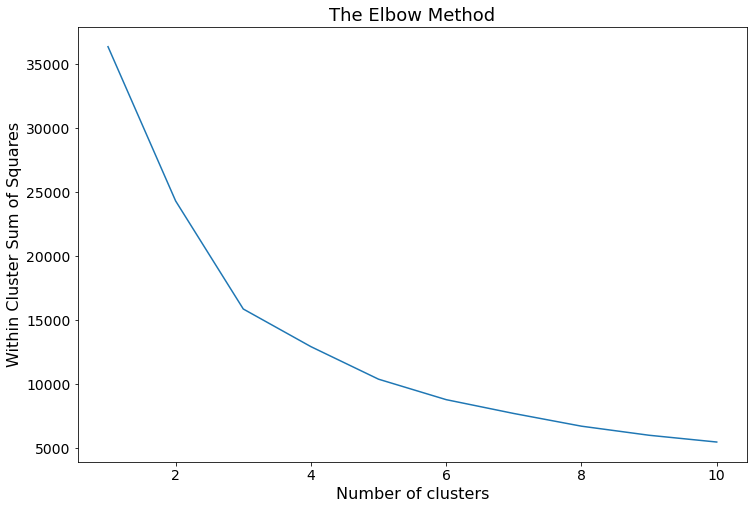

In [351]:
# depicting

plt.figure(figsize = (12, 8))
sns.lineplot(x = list(range(1, 11)), y = wcss)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('The Elbow Method', fontsize = 18)
plt.xlabel('Number of clusters', fontsize = 16)
plt.ylabel('Within Cluster Sum of Squares', fontsize = 16)

plt.show()

In [352]:
# fitting and predicting

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
kmeans.fit(clus_df)
y_kmeans = kmeans.predict(clus_df)

In [353]:
labels = kmeans.labels_
df['group'] = labels
df

/var/folders/z5/2xfh619x3csdbh0bph8vb9100000gn/T/ipykernel_18087/3054931132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = labels


,average_age,Year-Of-Publication,group
0,31.750000,2001.0,1
1,42.500000,1999.0,2
2,31.750000,1991.0,1
3,38.206061,1999.0,2
4,37.337662,1994.0,2
...,...,...,...
18180,32.500000,2001.0,1
18181,47.500000,1997.0,2
18182,37.250000,2003.0,2
18183,32.714286,1997.0,1


In [354]:
books_ratings['group'] = labels
books_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,level_0,index,average_rating,times_read,average_age,weighted_ratings,group
0,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada,clara callan by richard bruce wright,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10889,10858,7.500000,8,31.750000,7.656912,1
1,0374157065,flu story great influenza pandemic 1918 search...,gina bari kolata,1999.0,farrar straus giroux,flu story great influenza pandemic 1918 search...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7951,8047,7.833333,6,42.500000,7.745905,2
2,0399135782,kitchen god wife,amy tan,1991.0,putnam pub group,kitchen god wife by amy tan,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3322,3325,8.125000,16,31.750000,7.899820,1
3,0440234743,testament,john grisham,1999.0,dell,testament by john grisham,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9049,9049,7.721212,165,38.206061,7.721046,2
4,0452264464,beloved plume contemporary fiction,toni morrison,1994.0,plume,beloved plume contemporary fiction by toni mor...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7941,7941,7.753247,77,37.337662,7.746325,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18180,0375411615,love etc,julian barnes,2001.0,alfred e knopf,love etc by julian barnes,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16125,16178,6.000000,4,32.500000,7.433064,1
18181,0836227751,wit whimsy mary engelbreit,mary engelbreit,1997.0,andrews mcmeel publishing,wit whimsy mary engelbreit by mary engelbreit,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2990,2912,9.000000,4,47.500000,7.933064,2
18182,8433966634,los detective salvajes,roberto bolano,2003.0,anagrama,los detective salvajes by roberto bolano,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8669,8970,7.750000,4,37.250000,7.724730,2
18183,0330353349,ice house tv tie edition,minette walters,1997.0,mcclelland & stewart ltd,ice house tv tie edition by minette walters,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13532,13527,7.142857,7,32.714286,7.570131,1


In [355]:
df.groupby('group').mean()

,average_age,Year-Of-Publication
group,,
0,35.379608,1984.098071
1,31.544251,1997.996807
2,41.388549,1998.704549


<Axes: xlabel='Year-Of-Publication', ylabel='weighted_ratings'>

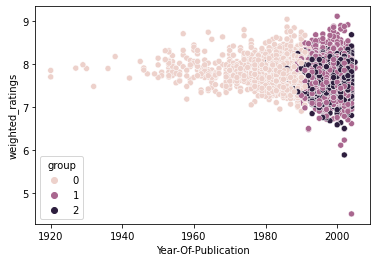

In [356]:
sns.scatterplot(books_ratings, x = 'Year-Of-Publication', y = 'weighted_ratings', hue = 'group')

<Axes: xlabel='average_age', ylabel='weighted_ratings'>

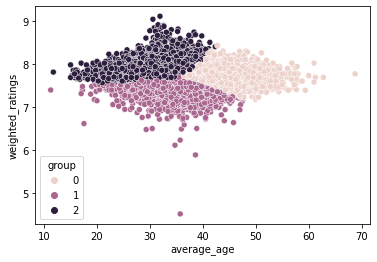

In [312]:
sns.scatterplot(books_ratings, x = 'average_age', y = 'weighted_ratings', hue = 'group')

In [313]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [314]:
df

,average_age,weighted_ratings,group
0,31.750000,7.656912,1
1,42.500000,7.745905,0
2,31.750000,7.899820,2
3,38.206061,7.721046,0
4,37.337662,7.746325,0
...,...,...,...
18180,32.500000,7.433064,1
18181,47.500000,7.933064,0
18182,37.250000,7.724730,0
18183,32.714286,7.570131,1


In [315]:
columns_to_standardize = ['weighted_ratings', 'Year-Of-Publication']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
books_ratings[columns_to_standardize] = scaler.fit_transform(books_ratings[columns_to_standardize])

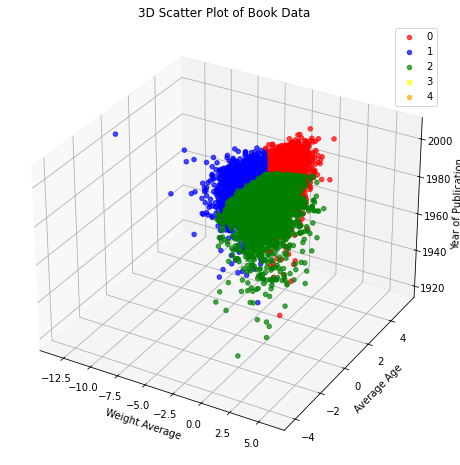

In [316]:
# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each group (you can customize this based on your groups)
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange'}

# Iterate over each group and plot the points
for group, color in colors.items():
    group_data = books_ratings[books_ratings['group'] == group]
    ax.scatter(group_data['weighted_ratings'], group_data['average_age'], group_data['Year-Of-Publication'], c=color, label=group, alpha=0.7)

# Set labels and title
ax.set_xlabel('Weight Average')
ax.set_ylabel('Average Age')
ax.set_zlabel('Year of Publication')
ax.set_title('3D Scatter Plot of Book Data')

# Add legend
ax.legend()

# Show plot
plt.show()


In [317]:
from sklearn.decomposition import PCA

In [318]:
# Create a PCA instance with desired number of components
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization

# Apply PCA to the scaled data
pca_result = pca.fit_transform(books_ratings[columns_to_standardize])

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [319]:
books_ratings = pd.merge(books_ratings,df_pca, left_index=True, right_index=True)

In [320]:
# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.5376884 0.4623116]


<Axes: xlabel='PC1', ylabel='PC2'>

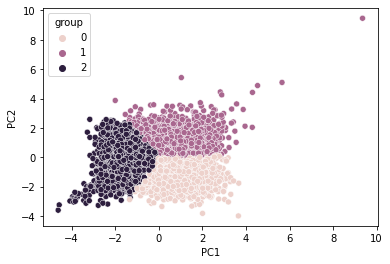

In [321]:
# Plot PCA results
sns.scatterplot(books_ratings, x = 'PC1', y = 'PC2', hue = 'group')

In [322]:
books_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Book-Publisher', 'Book-Info', 'Book-Vector', 'index', 'average_rating',
       'times_read', 'average_age', 'weighted_ratings', 'group', 'PC1', 'PC2'],
      dtype='object')

In [337]:
books_ratings[books_ratings['Book-Author'] == 'harper lee'].groupby('group')['times_read'].sum()

group
0      6
2    250
Name: times_read, dtype: int64

In [333]:
books_ratings.sort_values('Year-Of-Publication', ascending = False)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,index,average_rating,times_read,average_age,weighted_ratings,group,PC1,PC2
13658,0140622454,woman importance penguin popular classic,oscar wilde,2005.0,penguin books ltd,woman importance penguin popular classic by os...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3375,8.500000,6,-1.643271,0.789747,2,-1.720404,0.603533
11555,1881273156,five love language five love language,gary chapman,2005.0,moody publishers,five love language five love language by gary ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1319,8.437500,16,-0.006070,1.367866,2,-0.971520,-0.962935
1762,0140124373,red dwarf,grant naylor,2005.0,penguin books ltd,red dwarf by grant naylor,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3085,8.230769,13,-0.267266,0.878218,2,-0.809979,-0.432008
16508,0886777992,alien shore,c s friedman,2004.0,daw books,alien shore by c s friedman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7663,7.875000,8,0.523511,0.225198,0,0.210939,-0.529417
9406,0140143882,last human red dwarf,doug naylor,2004.0,penguin books ltd,last human red dwarf by doug naylor,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4238,8.285714,7,-1.271427,0.651106,2,-1.359437,0.438633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,0448095017,secret old clock nancy drew mystery story 1,carolyn keene,1930.0,grosset & dunlap,secret old clock nancy drew mystery story 1 by...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3938,8.045455,22,-0.467684,0.750519,2,-0.861399,-0.199995
13527,0684717972,farewell arm,ernest hemingway,1929.0,charles scribners sons,farewell arm by ernest hemingway,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1900,8.625000,8,-0.577187,1.116709,2,-1.197765,-0.381499
14483,0448089033,secret old mill hardy boy mystery story book 3,franklin w dixon,1927.0,grosset & dunlap,secret old mill hardy boy mystery story book 3...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3333,8.500000,6,0.571969,0.789747,0,-0.153993,-0.962879
3929,0684717603,great gatsby scribner classic,f scott fritzgerald,1920.0,scribner paper fiction,great gatsby scribner classic by f scott fritz...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5053,8.100000,10,-0.286437,0.567998,2,-0.604177,-0.199094


In [336]:
books_ratings.sort_values('weighted_ratings', ascending = False).head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,index,average_rating,times_read,average_age,weighted_ratings,group,PC1,PC2
2619,0439139597,harry potter goblet fire book 4,j k rowling,2000.0,scholastic,harry potter goblet fire book 4 by j k rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,9.311111,135,-0.719024,5.807226,2,-4.614756,-3.597902
2075,0345339738,return king lord ring part 3,j r r tolkien,1986.0,del rey,return king lord ring part 3 by j r r tolkien,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,9.397260,73,-0.940767,5.519015,2,-4.567756,-3.237310
2652,043935806X,harry potter order phoenix book 5,j k rowling,2003.0,scholastic,harry potter order phoenix book 5 by j k rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,9.024510,204,-0.779165,4.984478,2,-4.075511,-2.973605
3025,0439136369,harry potter prisoner azkaban book 3,j k rowling,2001.0,scholastic,harry potter prisoner azkaban book 3 by j k ro...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,9.068702,131,-0.606674,4.909660,2,-3.900637,-3.042670
1912,0439136350,harry potter prisoner azkaban book 3,j k rowling,1999.0,scholastic,harry potter prisoner azkaban book 3 by j k ro...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,9.035461,141,-0.726539,4.834715,2,-3.932400,-2.904919
15835,0439425220,harry potter chamber secret postcard book,j k rowling,2002.0,scholastic,harry potter chamber secret postcard book by j...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,9.869565,23,-0.593440,4.824761,2,-3.831247,-2.991996
1136,059035342X,harry potter sorcerer stone harry potter paper...,j k rowling,1999.0,arthur a levine books,harry potter sorcerer stone harry potter paper...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,8.938312,308,-0.686100,4.801412,2,-3.880257,-2.909965
428,0345339711,two tower lord ring part 2,j r r tolkien,1986.0,del rey,two tower lord ring part 2 by j r r tolkien,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,9.135802,81,-0.794096,4.765536,2,-3.931254,-2.808232
5468,0618002235,two tower lord ring part 2,j r r tolkien,1999.0,houghton mifflin company,two tower lord ring part 2 by j r r tolkien,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8,9.791667,24,-0.653336,4.742535,2,-3.815457,-2.891501
12,0446310786,kill mockingbird,harper lee,1988.0,little brown and company,kill mockingbird by harper lee,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,8.946078,204,-0.902143,4.687308,2,-3.952339,-2.676515
